# Titanic Project Classification
In this notebook, I tried to understand the relationship between variables and classify who survived and  who did not . with help of  (1 - data visualization  2 - feature Engineering  3 - model building )


## Overview 
### 1) Understand the data (Shape , missing values , data types , ...)

### 2) Data Visualization  (Histograms,box plots)

### 3) Data Preprocessing and Feature Engineering

### 4) Model Building 

# Libraries used in the project

- [seaborn](https://seaborn.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [termcolor](https://pypi.org/project/termcolor/)
- [sklearn](https://scikit-learn.org/stable/)
- [xgboost](https://xgboost.readthedocs.io/en/latest/index.html)
- re
- warnings

In [1]:
!pip install  xgboost==1.4.1

     |████████████████████████████████| 166.7 MB 57 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.4.0
    Uninstalling xgboost-1.4.0:
      Successfully uninstalled xgboost-1.4.0


In [2]:
# Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt


# Data PreProcessing and Feature Engineering
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import re


# Model Building 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from  xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# import dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import warnings  # For hiding warnings
from termcolor import cprint # For making colorful printing texts
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# import  datasets in (csv) format using pandas 

train = pd.read_csv('../input/titanic/train.csv') # reading training set (data use for training model)

test  = pd.read_csv('../input/titanic/test.csv')  # reading testing set (data use for testing model)

dataset = train.append(test, ignore_index=True) # combine train and test data to preprocessing data easier

# Understanding The Data 
In this part , I tried to get a background of the data that im gonna use like what is the data types , how many missing values our data have ,  and describe the numeric variables of the data wuth help of (Pandas,Numpy,Python)

In [4]:
# Showing first samples of train set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Showing first samples of test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Showing Count of null Values and Data type of Train & Test data
train.info()

cprint('*'*42,'green')  # print colorfull text with cprint 

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

In [7]:
# using .describe() to understand better  numeric data of train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# using .describe() to understand better numeric data of test data
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Null Values in Training Data :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Null Values in Test Data :
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


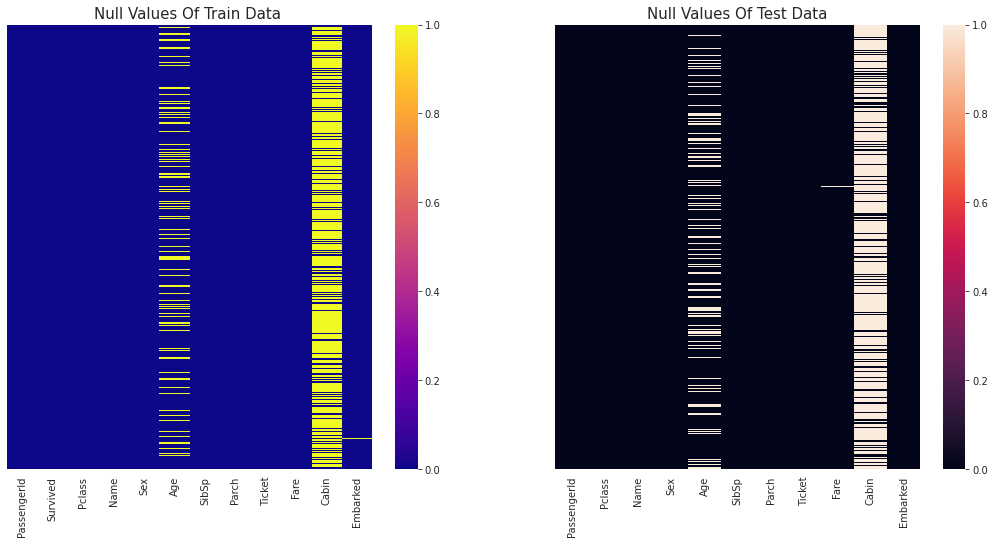

In [9]:
cprint('Null Values in Training Data :','green')
print(train.isnull().sum()) # showing null values of train data
cprint('Null Values in Test Data :','green')
print(test.isnull().sum()) # showing null values  of test data

plt.figure(figsize=(18,18))

# using .heatmap() from seaborn to visualize null values
plt.subplot(221)
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values Of Train Data ',size=15);
plt.subplot(222)
sns.heatmap(test.isnull(), yticklabels = False)
plt.title('Null Values Of Test Data',size=15);

# Data Visualization 
this part realy helped me to understand data better especially for (feature engineering and data cleaning) for example what's the percent of survived and mean age of each Pclass and ... , with help of seaborn and matplotlib to visualize the data

Percent Of Survived :
      Sex  Survived
0  female  0.742038
1    male  0.188908
Count Of Male/Female :
Sex
female    314
male      577
dtype: int64


Text(0.5, 1.0, 'Number of passenger did/didnt Survived By Gender')

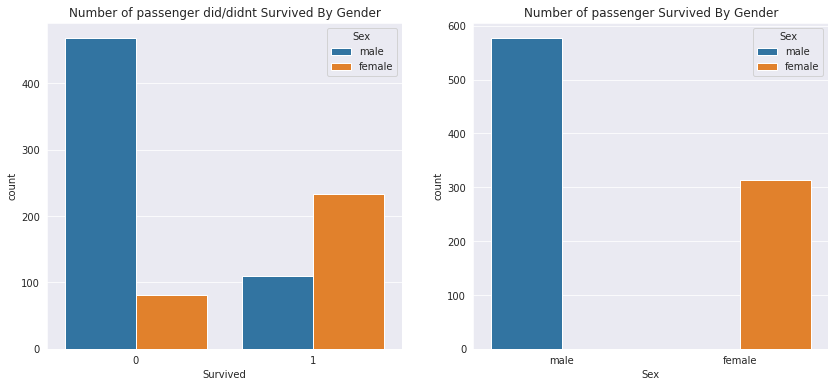

In [10]:
cprint('Percent Of Survived :','green')
# Showing  Percentage of survivors of Both gender Male/Female
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

cprint('Count Of Male/Female :','green')
# Showing  Count of Both gender Male/Female
print(train.groupby('Sex').size())

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,6))

# using .countplot() from seaborn to visualize  Count of each gender and survived percent
sns.countplot(x = 'Survived', hue='Sex', data=train, ax =  axis1)
axis2.set_title('Number of passenger Survived By Gender')

sns.countplot(x='Sex',data=train,hue='Sex', ax = axis2)
axis1.set_title('Number of passenger did/didnt Survived By Gender')

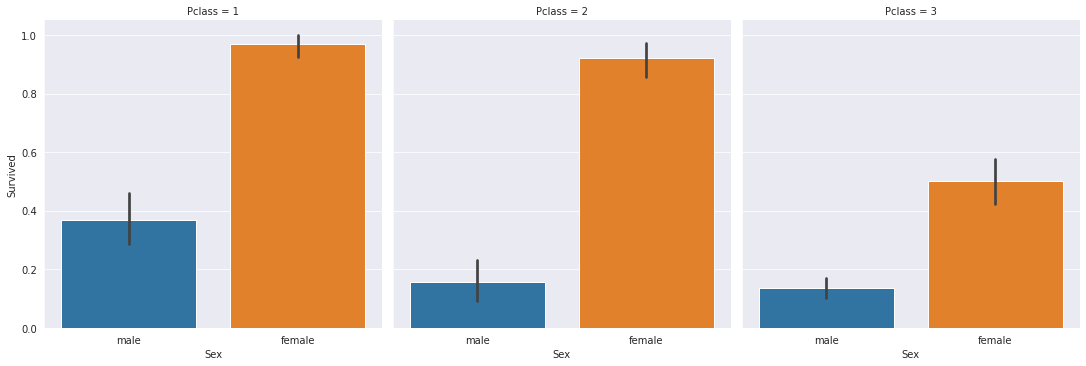

In [11]:
# using .catplot() from  seaborn to  visualize count of survived gender  in each Pclass
sns.catplot(x = 'Sex', y = 'Survived', data = train, kind = 'bar', col = 'Pclass')

Percent Of Survived :
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
Count Of Each Embarked  :
Embarked
C    168
Q     77
S    644
dtype: int64


Text(0.5, 1.0, 'Number of passenger Survived in each Pclass')

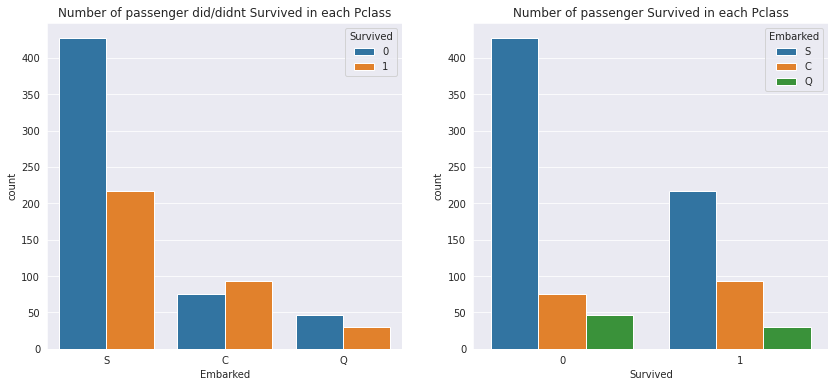

In [12]:
cprint('Percent Of Survived :','green')

# Showing  Percentage of survivors of Each Embarked
print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))

cprint('Count Of Each Embarked  :','green')

# Showing  Count  of Pepole  of Each Embarked
print(train.groupby('Embarked').size())

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,6))

# Showing  count of survived of Each Embarked
sns.countplot('Embarked', hue = 'Survived', data = train,ax=axis1)
axis1.set_title('Number of passenger did/didnt Survived in each Pclass')
sns.countplot(x='Survived',data=train,hue='Embarked', ax = axis2)
axis2.set_title('Number of passenger Survived in each Pclass')


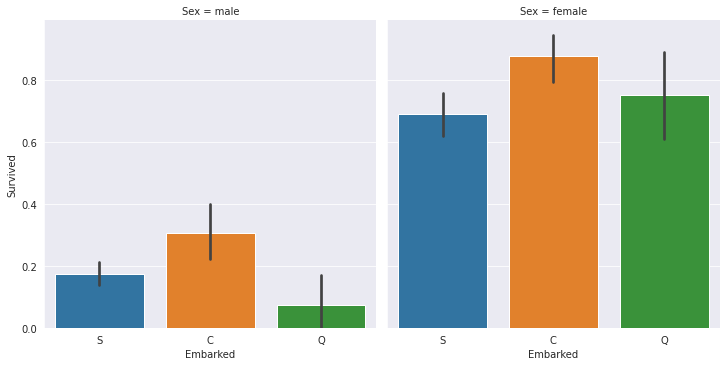

In [13]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = train, col = 'Sex')

Text(0.5, 1.0, 'Age Distribution of passengers')

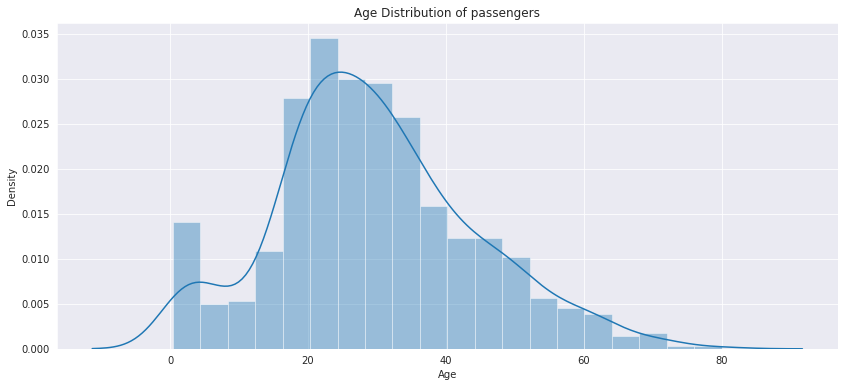

In [14]:
plt.figure(figsize = (14, 6))
# showing distribute of age column with .distplot() of seaborn
sns.distplot(train['Age'])
plt.title('Age Distribution of passengers',)

Text(0.5, 1.0, 'Mean Value of Age of each gender')

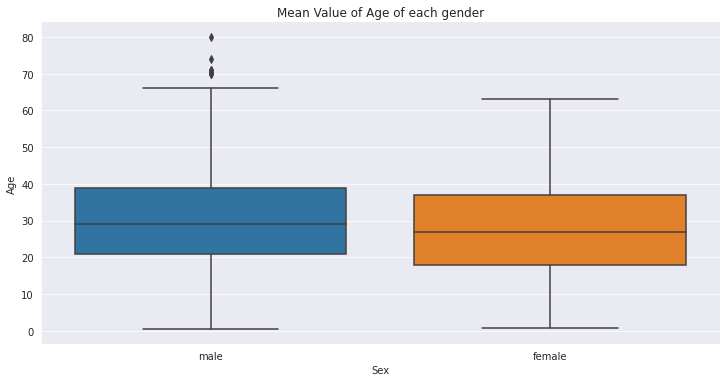

In [15]:
# showing mean age of Male/Female using boxplot
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train, height = 5, aspect = 2)
plt.title('Mean Value of Age of each gender',)

Text(0.5, 0.98, 'Mean Value of Age of each male/femlae in  Pclasses')

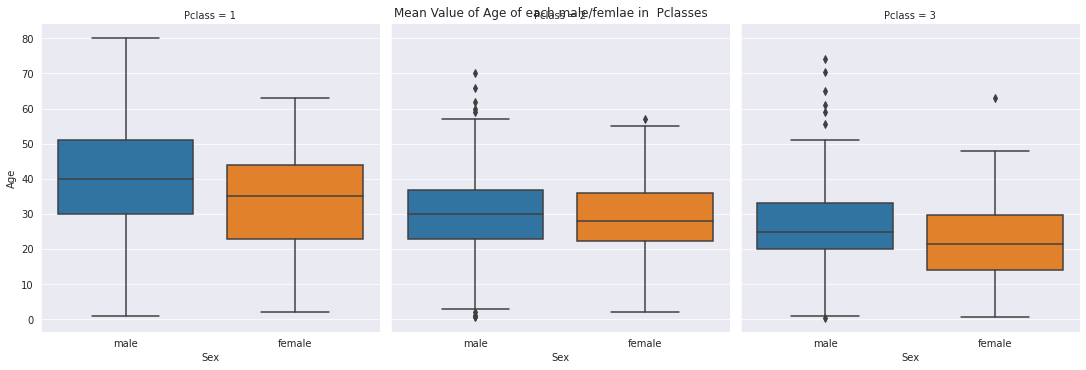

In [16]:
# showing mean age of each geneder of each Ticket class (Pclass) using boxplot
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train, col = 'Pclass')
#plt.title('Mean Value of Age of each male/femlae in  Pclasses')
plt.suptitle('Mean Value of Age of each male/femlae in  Pclasses')

Text(0.5, 1.0, 'Mean Value of Age of each  Pclass Passengers (Train Data)')

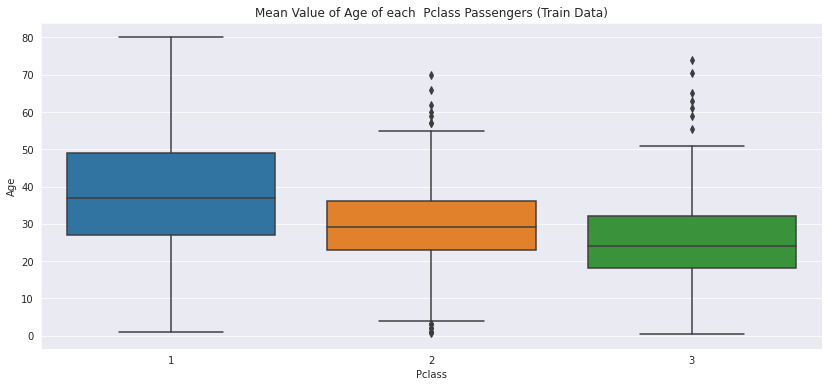

In [17]:
plt.figure(figsize = (14, 6))
# showing mean age of each Ticket class (Pclass) using boxplot
sns.boxplot(x='Pclass',y='Age',data=train)
plt.title('Mean Value of Age of each  Pclass Passengers (Train Data)',)

Text(0.5, 1.0, 'Mean Value of Age of each  Pclass Passengers (Test Data)')

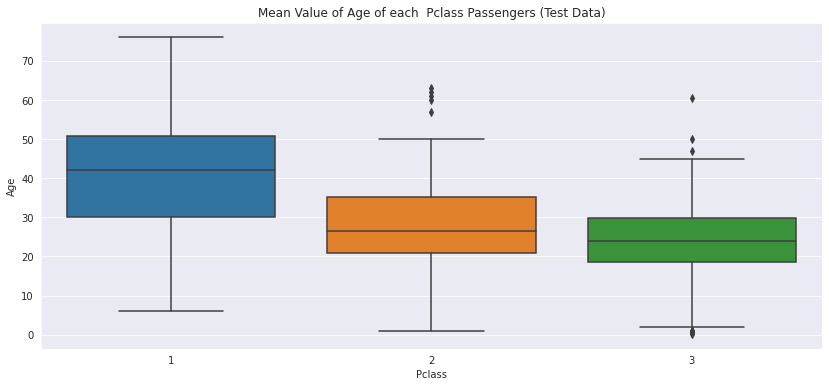

In [18]:
plt.figure(figsize = (14, 6))
# showing mean age of each Ticket class (Pclass) using boxplot for test data
sns.boxplot(x='Pclass',y='Age',data=test)
plt.title('Mean Value of Age of each  Pclass Passengers (Test Data)',)

Text(0.5, 1.0, 'Difference in the amount of \xa0Fare paid')

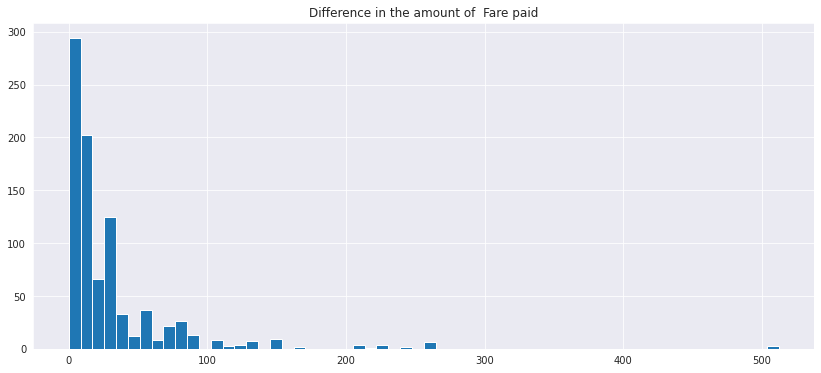

In [19]:
plt.figure(figsize = (14, 6))
# showing histogram of Paid Fare using .hist() of matplotlib 
plt.hist('Fare',data=train, bins = 60)
plt.title('Difference in the amount of  Fare paid')

Percent Of Survived :
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
Count Of Each Embarked  :
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64


Text(0.5, 1.0, 'Number of Siblings or  couples  Survived by gender')

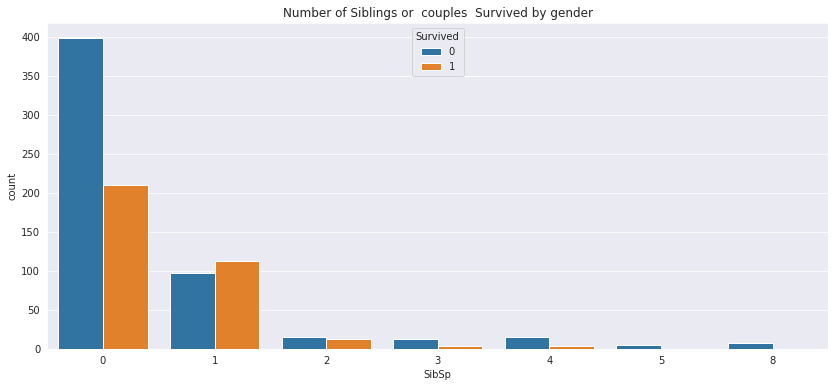

In [20]:
cprint('Percent Of Survived :','green')
# Showing  Percentage of survivors of Siblings or  couples 
print(train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cprint('Count Of Each Embarked  :','green')
# Showing  count of   Siblings or  couples 
print(train.groupby('SibSp').size())
plt.figure(figsize = (14, 6))
# using .countplot() of seaborn to  visualize  Count survived Siblings or  couples 
sns.countplot(x = 'SibSp', data = train, hue = 'Survived')
plt.title('Number of Siblings or  couples  Survived by gender')

Percent Of Survived :
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
Count Of Each Embarked  :
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64


Text(0.5, 1.0, 'Number of Siblings or  couples  Survived')

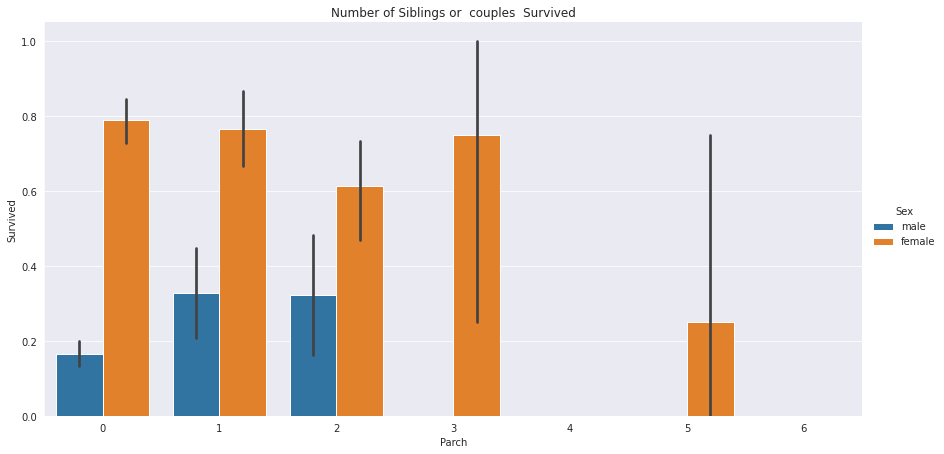

In [21]:
cprint('Percent Of Survived :','green')
# Showing  Percentage of survivors of Parents /children   
print(train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cprint('Count Of Each Embarked  :','green')
# Showing  count of   Parents /children   
print(train.groupby('Parch').size())
# using .countplot() of seaborn to  visualize  Count survived Siblings or  couples 
sns.catplot(x = 'Parch', y = 'Survived', data = train, hue = 'Sex', kind = 'bar', height = 6, aspect = 2)
plt.title('Number of Siblings or  couples  Survived')

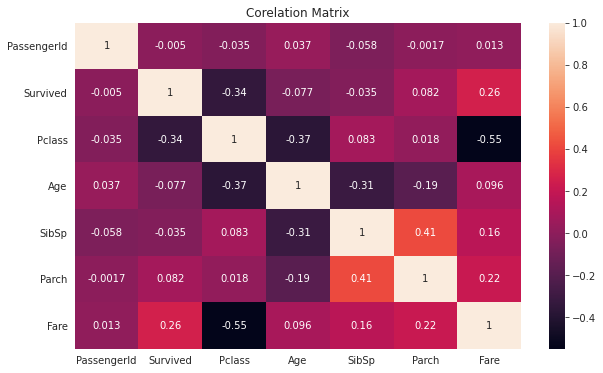

In [22]:
plt.figure(figsize = (10, 6))
# using .heatmap() of seaborn to understand better relationship of variables 
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cleaning and  Data Preprocessing and Feature Engineering Data 

 This is the most important part of the project in my opinion, your data  can be compared to a dirty and old house that you have to clean and change its decoration and add new rooms to it , The more beautiful and new and bigger  your house is ,  higher (more accurate)  it will be sold :D
#### 1) OneHot Encoding Gender 

#### 2) Convert Embarked into dummies

#### 3) Fill Missing Values of Cabin and categorise it better

#### 4) Convert Cabins into numbers 

#### 5) Create a new feature as FamilySize

#### 6) Drop unused columns

#### 7) Fill Missing Values of Fare

#### 8) Fill Missing Values of Age

In [24]:
# replace Gender with 0 and 1  in test & train data

dataset.Sex[dataset.Sex == 'male'] = 0 # repalce male with 0
dataset.Sex[dataset.Sex == 'female'] = 1 # repalce female with 1

In [25]:
# Convert Embarked into dummies using pd.get_dummies()
dummies  = pd.get_dummies(dataset.Embarked)
dataset = pd.concat([dataset,dummies],axis='columns')
dataset.drop(['Embarked'],axis='columns',inplace=True)

In [26]:
# replace Nan values of Cabin with U (Unknown)
dataset.Cabin = dataset.Cabin.fillna('U')

In [27]:
# Using Regex to find letters and categories better cabin 
dataset.Cabin = dataset.Cabin.map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [28]:
dataset.groupby('Cabin').size()

Cabin
A      22
B      65
C      94
D      46
E      41
F      21
G       5
T       1
U    1014
dtype: int64

In [29]:
# replace Cabins with numbers 
cabin_dictionary = {'A':1 , 'B':2, 'C':3 , 'D':4 , 'E':5 , 'F':6 , 'G':7 , 'T':8 , 'U':9}

dataset = dataset.replace({'Cabin':cabin_dictionary})

In [30]:
# combaine number of siblings and  spouses  to get  FamilySize 
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [31]:
# replace missing Fare value of test data with median of Fares 
dataset.Fare = dataset.Fare.fillna(dataset.Fare.median())

In [32]:
# drop unused columns of test and train data 
dataset = dataset.drop(['Name','SibSp', 'Parch', 'Ticket'], axis = 1)

In [33]:
# split train  and test set 
train_main = dataset[dataset['Survived'].notna()] # train set Survived != null
test_main  = dataset[dataset['Survived'].isnull()] # train set Survived == null

In [34]:
# replace Missing values of age row with mean age of each Ticket class (Pclass) of train data
def clean_training_age(columns) :
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass ==1 :
            return 37
        elif  Pclass == 2 :
            return 29
        else : 
            return 24
    else : 
        return Age

In [35]:
# replace Missing values of age  with mean age of each Ticket class (Pclass) of test data
def clean_test_age(columns) :
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass ==1 :
            return 44
        elif  Pclass == 2 :
            return 27
        else : 
            return 23
    else : 
        return Age

In [36]:
# fill age missing values with mean age of each Pclass according to the  boxplot
train_main.Age = train_main[['Age','Pclass']].apply(clean_training_age,axis=1) 
test_main.Age = test_main[['Age','Pclass']].apply(clean_test_age,axis=1) 

In [37]:
# drop Survived of  test data 
test_main.drop('Survived',axis =1,inplace=True)

In [38]:
train_main.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,C,Q,S,FamilySize
0,1,0.0,3,0,22.0,7.2500,9,0,0,1,2
1,2,1.0,1,1,38.0,71.2833,3,1,0,0,2
2,3,1.0,3,1,26.0,7.9250,9,0,0,1,1
3,4,1.0,1,1,35.0,53.1000,3,0,0,1,2
4,5,0.0,3,0,35.0,8.0500,9,0,0,1,1


In [39]:
test_main.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,C,Q,S,FamilySize
891,892,3,0,34.5,7.8292,9,0,1,0,1
892,893,3,1,47.0,7.0000,9,0,0,1,2
893,894,2,0,62.0,9.6875,9,0,1,0,1
894,895,3,0,27.0,8.6625,9,0,0,1,1
895,896,3,1,22.0,12.2875,9,0,0,1,3


# Building and Evaluating Model
Now it's time to sell our fresh house and our house  buyers or customers are Models  (ML algorithms) whoever offers a higher price (more accuracy) can buy the house, note that house customers based on the house (data) and house features (data features) and house usage purpose (classification or regression)

In [40]:
# split independent and dependent variables
X_train = train_main.drop('Survived',axis=1) # independent
y_train = train_main.Survived # dependent

## Scaling Data
Tip : usually we dont StandardScale data with dummies and OneHot encoded varibels include but  in this case it doesn't matter use the standardscaler  because the scaling is independently for each colum

In [41]:
# scale our independent variables  with help  StandardScaler
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
test_main_scale  = scaler.fit_transform(test_main) 

## [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [42]:
lrc = LogisticRegression()
lrc.fit(X_train_scale,y_train)

LogisticRegression()

In [43]:
y_pred_lrc = lrc.predict(test_main_scale).astype(int)

## [Support vector machine](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [44]:
svm = SVC()
svm.fit(X_train_scale,y_train)

SVC()

In [45]:
y_pred_svm = svm.predict(test_main_scale).astype(int)

## [K nearest neighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [47]:
y_pred_knn = knn.predict(test_main_scale).astype(int)

## [Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [48]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [49]:
y_pred_nb = nb.predict(test_main).astype(int)

## [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [50]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred_dt = dt.predict(test_main).astype(int)

## [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred_rf = rf.predict(test_main).astype(int)

## [GradientBoostingClassifier](http://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [54]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [55]:
y_pred_gbc = gbc.predict(test_main).astype(int)

## [XGBClassifier](https://xgboost.readthedocs.io/en/latest/index.html)

In [56]:
xgb = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 8,
                    nthread= 5,
                    random_state= 0,
                    )
xgb.fit(X_train_scale,y_train)

[14:53:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.99, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=5, nthread=5, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [57]:
y_pred_xgb = xgb.predict(test_main_scale).astype(int)

## Output
### save output as csv

In [58]:
final_data_1 = {'PassengerId': test_main.PassengerId, 'Survived': y_pred_xgb}
submission_1 = pd.DataFrame(data=final_data_1)
submission_1.to_csv('submission_xgb.csv',index =False)